### AI Bootcamp - June 2024 Cohort - Analyzing and Predicting Flight Delays
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

## Libraries Imported
* Pandas
* Numpy
* Matplotlib
* sklearn
    * StandardScaler
    * PCA
    * LabelEncoder

In [126]:
# Do imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Read In Data to DataFrame

In [127]:
# Create DataFrame
df = pd.read_csv('./data/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [128]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [129]:
len(df['AirportFrom'].unique())

293

In [130]:
# Commenting out the time encoding since this gets formatted as a string and cannot be used for clustering
# df['Time_encoded'] = df['Time'].apply(lambda x: f"{x // 60:02d}:{x % 60:02d}")
# df.head()

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


### Preprocessing: Encoding 'AirportFrom', 'AirportTo', 'Airline' Columns

In [132]:
airport_codes = df['AirportFrom'].unique()
airport_codes

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

### Make a copy of the DataFrame for preprocessing

In [133]:
encoded_df = df.copy()

In [134]:
unique_codes = encoded_df['AirportFrom'].unique()
code_to_id = {code: idx for idx, code in enumerate(unique_codes, start=1)}

# Apply the mapping to create a new column with unique IDs
encoded_df['AirportFromIDs'] = encoded_df['AirportFrom'].map(code_to_id)
encoded_df['AirportToIDs'] = encoded_df['AirportTo'].map(code_to_id)

encoded_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs
0,1,CO,269,SFO,IAH,3,15,205,1,1,103
1,2,US,1558,PHX,CLT,3,15,222,1,2,109
2,3,AA,2400,LAX,DFW,3,20,165,1,3,72
3,4,AA,2466,SFO,DFW,3,20,195,1,1,72
4,5,AS,108,ANC,SEA,3,30,202,0,4,22
...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,194,229
539379,539380,FL,398,SEA,ATL,5,1439,305,0,22,55
539380,539381,FL,609,SFO,MKE,5,1439,255,0,1,17
539381,539382,UA,78,HNL,SFO,5,1439,313,1,12,1


In [135]:
# Get unique airline codes
unique_airlines = encoded_df['Airline'].unique()

# Create a random mapping for each unique airline code
random.seed(42)  # Set a seed for reproducibility, remove if you want different random results each time
airline_to_id = {airline: random.randint(1000, 9999) for airline in unique_airlines}

# Apply the random mapping to the airline column
encoded_df['AirlineID'] = encoded_df['Airline'].map(airline_to_id)

encoded_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs,AirlineID
0,1,CO,269,SFO,IAH,3,15,205,1,1,103,2824
1,2,US,1558,PHX,CLT,3,15,222,1,2,109,1409
2,3,AA,2400,LAX,DFW,3,20,165,1,3,72,5506
3,4,AA,2466,SFO,DFW,3,20,195,1,1,72,5506
4,5,AS,108,ANC,SEA,3,30,202,0,4,22,5012


In [136]:
len(encoded_df["AirportFrom"].unique())

293

In [137]:
len(encoded_df["AirportTo"].unique())

293

In [138]:
# Drop all the categorical columns
encoded_df = encoded_df.drop(columns=['Airline', 'AirportFrom', 'AirportTo'])
encoded_df.head()

,id,Flight,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs,AirlineID
0,1,269,3,15,205,1,1,103,2824
1,2,1558,3,15,222,1,2,109,1409
2,3,2400,3,20,165,1,3,72,5506
3,4,2466,3,20,195,1,1,72,5506
4,5,108,3,30,202,0,4,22,5012


In [139]:
# Drop the id column since this is a hard-coded index
encoded_df = encoded_df.drop(columns=['id'])
encoded_df.head()

,Flight,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs,AirlineID
0,269,3,15,205,1,1,103,2824
1,1558,3,15,222,1,2,109,1409
2,2400,3,20,165,1,3,72,5506
3,2466,3,20,195,1,1,72,5506
4,108,3,30,202,0,4,22,5012


In [140]:
### Correlation

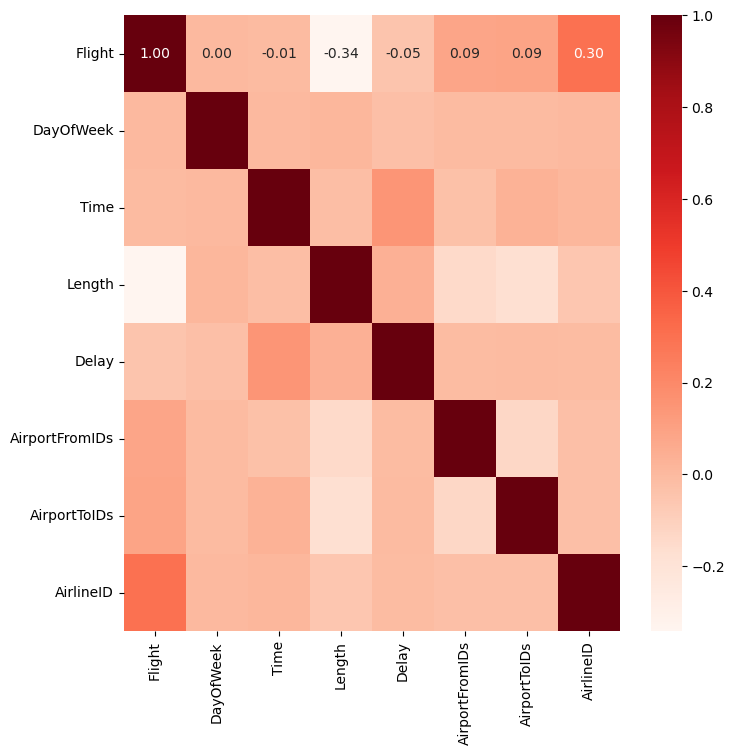

In [141]:
# Create a correlation matrix to see how features are related
plt.figure(figsize=(8,8))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

### Prepare the data for modeling

In [142]:
# Define X for training and testing and drop the Delay column since it's our target
X = encoded_df.copy()
X.drop('Delay', axis=1, inplace=True)
X.head()

,Flight,DayOfWeek,Time,Length,AirportFromIDs,AirportToIDs,AirlineID
0,269,3,15,205,1,103,2824
1,1558,3,15,222,2,109,1409
2,2400,3,20,165,3,72,5506
3,2466,3,20,195,1,72,5506
4,108,3,30,202,4,22,5012


In [143]:
# Define the Delay column as our target
y = df['Delay']

### Scale the Data
SVM, KNN, K-Means, and PCA need scaling

In [144]:
# Scaling the X train data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.09447296,  1.08199271,  0.01063145, ...,  1.82992654,
        -1.05211002, -0.75328146],
       [ 2.01121043, -1.00719177,  1.00286384, ...,  2.43184152,
        -0.19638348,  2.16454157],
       [-0.8346985 ,  0.55969659, -0.35246809, ..., -1.21132809,
        -0.38654493, -1.26398092],
       ...,
       [ 0.14828415, -1.00719177, -1.26920454, ...,  0.8636946 ,
        -0.83025499,  0.04212289],
       [ 1.46021769, -0.48489565, -0.83779915, ..., -0.37181509,
        -0.76686784, -1.21934498],
       [ 0.77038833, -0.48489565, -0.22664152, ...,  0.89537434,
        -0.19638348,  0.10405023]])

In [145]:
# Scale X test data by using StandardScaler()
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.13268931,  0.03740047, -0.99957617, ..., -1.21132809,
        -0.35485136, -1.26398092],
       [-0.45737249, -0.48489565, -1.44895678, ...,  0.3726587 ,
        -0.87779535, -0.11872733],
       [ 0.77232333,  0.55969659,  0.52831791, ...,  0.10338094,
        -0.37069815, -0.85582348],
       ...,
       [ 1.25752589, -1.52948788, -1.59275858, ...,  1.03793315,
        -0.37069815, -1.21934498],
       [ 0.59527036,  1.60428882,  1.08554987, ..., -1.21132809,
         0.94458524, -0.11872733],
       [-0.66054803,  0.55969659, -0.04688927, ..., -0.0708576 ,
         0.07301191, -0.50919125]])